references:


*   https://www.kaggle.com/code/ryanholbrook/clustering-with-k-means
*   https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
*   https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use.
*   https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#:~:text=Mutual%20information%20(MI)%20%5B1,higher%20values%20mean%20higher%20dependency.
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#change the dataset directory
detmold_buildings=pd.read_csv('/content/gdrive/MyDrive/Detmold - centroids of building shapes.csv')#put your directory between ''

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
detmold_buildings.head()

,fid,Fest_ID,OS,GEB_HOEHE,JAHRES_T,GEB_KLASSE,VOL,GEBAEUDETY,AGS,AGS5,...,GEB_TYP,spez_WB_HU,WB_HU,EBZ_Final,WLD_ID,GEB_TYP_IF,Shape_Leng,Shape_Area,xcoord,ycoord
0,1,17069243,31001_1010,6.000,9.2,1,158.278092,EFH/DHH,5766020,5766,...,NaN,80.385912,3094.313558,38.493232,1081886,NG,20.510632,26.379682,484284.114587,5.753658e+06
1,2,17069249,31001_1010,4.689,9.2,1,56.428289,EFH/DHH,5766020,5766,...,NaN,80.385912,1103.164796,13.723360,1081886,NG,14.613911,12.034184,484254.667101,5.753727e+06
2,3,17069307,31001_1010,7.300,9.1,1,184.094535,EFH/DHH,5766020,5766,...,NaN,80.646651,3610.695003,44.771791,1081422,HG,20.962259,25.218429,484966.626147,5.753724e+06
3,4,17069308,31001_1010,7.300,9.1,1,95.867688,EFH/DHH,5766020,5766,...,NaN,80.646651,1880.278420,23.315022,1081422,NG,14.505134,13.132560,484968.156834,5.753721e+06
4,5,17069381,31001_1010,4.609,9.1,1,146.370345,EFH/DHH,5766020,5766,...,NaN,80.646651,2870.800444,35.597268,1082016,NG,23.121180,31.757506,484620.397396,5.753898e+06


In [ ]:
detmold_buildings.tail()

,fid,Fest_ID,OS,GEB_HOEHE,JAHRES_T,GEB_KLASSE,VOL,GEBAEUDETY,AGS,AGS5,...,GEB_TYP,spez_WB_HU,WB_HU,EBZ_Final,WLD_ID,GEB_TYP_IF,Shape_Leng,Shape_Area,xcoord,ycoord
49351,49352,5165600,1301,5.77,9.3,1,463.570257,EFH/DHH,5766020,5766,...,HG,144.111962,16247.257695,112.740521,1076450,HG,38.743002,80.341633,489030.172437,5.753084e+06
49352,49353,5165611,1301,4.90,9.4,1,901.425945,EFH/DHH,5766020,5766,...,HG,131.799266,28894.096301,219.228052,1090753,HG,66.122551,183.965538,484960.481229,5.755202e+06
49353,49354,5165612,1004,3.10,9.4,0,68.833606,NaN,5766020,5766,...,NG,0.000000,0.000000,0.000000,0,NG,20.354803,22.204554,484968.275874,5.755212e+06
49354,49355,5165619,1301,10.18,9.4,1,1354.698351,MFH,5766020,5766,...,HG,158.572213,52243.776119,329.463625,1088058,HG,46.995936,133.074892,491386.683026,5.754722e+06
49355,49356,5165620,1301,6.71,9.2,1,395.941712,RH,5766020,5766,...,HG,129.151315,12436.451693,96.293651,1070705,HG,31.315481,59.008091,494034.222238,5.752064e+06


In [ ]:
detmold_buildings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49356 entries, 0 to 49355
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fid         49356 non-null  int64  
 1   Fest_ID     49356 non-null  int64  
 2   OS          49356 non-null  object 
 3   GEB_HOEHE   49356 non-null  float64
 4   JAHRES_T    49356 non-null  float64
 5   GEB_KLASSE  49356 non-null  int64  
 6   VOL         49356 non-null  float64
 7   GEBAEUDETY  19848 non-null  object 
 8   AGS         49356 non-null  int64  
 9   AGS5        49356 non-null  int64  
 10  CellCode    49356 non-null  object 
 11  Gemeindena  49356 non-null  object 
 12  Kreisname   49356 non-null  object 
 13  Funktion    49356 non-null  object 
 14  GEB_TYP     40862 non-null  object 
 15  spez_WB_HU  49356 non-null  float64
 16  WB_HU       49356 non-null  float64
 17  EBZ_Final   49356 non-null  float64
 18  WLD_ID      49356 non-null  int64  
 19  GEB_TYP_IF  49356 non-nul

In [ ]:
#columns to select (relevant+no missing values):
#1.fest_id; building id
#3.GEB_HOEHE: building height
#4.JAHRES_T:  Annual mean temperature
#5.GEB_KLASSE: building class
#6.VOL: building volum
#7.GEBAEUDETY:EFH/DHH, RH, MFH, GMFH, HH; GEB_KLASSE<>1 -> NULL
#9.cellcode: ID of the grid cell
#10.gemeindena: Name of the municipality in which the house ring is located
#11.Kreisname: Name of the circle in which the house perimeter is located
#12.Funktion: building function (residential,indusrial,...)
#14.GEB_TYP: Typology "main building", "outbuilding"; only for existing buildings; for new buildings ZERO
#19.Shape_Leng: shape length
#20.Shape_Area: shape area
#22+23: centroid coordinates


#other potential interesting columns
#1.OS: object key
#7.AGS: municipality key
#8.AGS5??????????
#15.spez_WB_HU: Area-specific heat demand per house perimeter (RW+WW;no PW), kWh/m²*a
#16.WB_HU: absolute heat demand per house perimeter (RW+WW; no process heat): EBZ_Final * spez_WB_HU, kWh/a
#16.EBZ_Final: Energy demand area of the building, m²
#17.WLD_ID: ID of the associated street section
#19.GEB_TYP_IF: HG=main building -> at least one house coordinate lies within the house perimeter; NG=secondary building -> there is no house coordinate in the house
#perimeter; Recalculation by IFAM

In [ ]:
detmold_buildings['spez_WB_HU']

0         80.385912
1         80.385912
2         80.646651
3         80.646651
4         80.646651
            ...    
49351    144.111962
49352    131.799266
49353      0.000000
49354    158.572213
49355    129.151315
Name: spez_WB_HU, Length: 49356, dtype: float64

In [ ]:
#print the available building types
detmold_buildings.GEBAEUDETY.unique()

#which building types should we consider??????????
#EFH/DHH: single family house semi detached
#GMFH: big multifamilty house
#MFH: multifamily house
#RH: single family houses bordering/attaching each other
#HH: a tall appartment complex for e.g.

array(['EFH/DHH', nan, 'GMFH', 'MFH', 'RH', 'HH'], dtype=object)

In [ ]:
#Area-specific heat demand per house perimeter (RW+WW;no PW)

detmold_buildings.spez_WB_HU

0         80.385912
1         80.385912
2         80.646651
3         80.646651
4         80.646651
            ...    
49351    144.111962
49352    131.799266
49353      0.000000
49354    158.572213
49355    129.151315
Name: spez_WB_HU, Length: 49356, dtype: float64

In [ ]:
detmold_buildings.spez_WB_HU.describe()

count    49356.000000
mean        81.425519
std         75.687753
min          0.000000
25%          0.000000
50%        116.097199
75%        152.997000
max        318.981000
Name: spez_WB_HU, dtype: float64

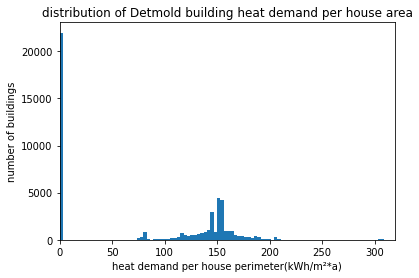

In [ ]:
plt.hist(detmold_buildings.spez_WB_HU,bins=100)
plt.xlabel('heat demand per house perimeter(kWh/m²*a)')
plt.ylabel('number of buildings')
plt.title('distribution of Detmold building heat demand per house area')
plt.xlim(detmold_buildings.spez_WB_HU.min(), detmold_buildings.spez_WB_HU.max())
plt.show()

In [ ]:
len(detmold_buildings.loc[detmold_buildings.spez_WB_HU==0])/len(detmold_buildings)*100

44.49712294351244

In [ ]:
detmold_buildings.loc[detmold_buildings.spez_WB_HU==0]

,fid,Fest_ID,OS,GEB_HOEHE,JAHRES_T,GEB_KLASSE,VOL,GEBAEUDETY,AGS,AGS5,...,GEB_TYP,spez_WB_HU,WB_HU,EBZ_Final,WLD_ID,GEB_TYP_IF,Shape_Leng,Shape_Area,xcoord,ycoord
6,7,17069471,31001_2723,2.817,9.3,0,46.688864,NaN,5766020,5766,...,NaN,0.0,0.0,0.0,0,NG,18.225292,16.573967,484803.896084,5.754706e+06
11,12,17072056,31001_2000,2.389,9.2,0,54.806419,NaN,5766020,5766,...,NaN,0.0,0.0,0.0,0,NG,19.189578,22.941155,485657.386983,5.753876e+06
39,40,17072301,31001_1313,2.522,9.3,0,18.143086,NaN,5766020,5766,...,NaN,0.0,0.0,0.0,0,NG,10.798633,7.193928,485257.738094,5.754376e+06
40,41,17072302,31001_1313,1.759,9.3,0,5.341238,NaN,5766020,5766,...,NaN,0.0,0.0,0.0,0,NG,7.005395,3.036520,485256.684744,5.754374e+06
43,44,17072332,51009_1610,2.325,9.3,0,33.918075,NaN,5766020,5766,...,NaN,0.0,0.0,0.0,0,NG,28.327283,14.588419,485385.569553,5.754425e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49340,49341,5165472,1004,8.420,9.4,0,132.747332,NaN,5766020,5766,...,NG,0.0,0.0,0.0,0,NG,16.730416,15.765740,492367.237584,5.756816e+06
49342,49343,5165482,1004,3.420,9.5,0,83.707056,NaN,5766020,5766,...,NG,0.0,0.0,0.0,0,NG,21.504237,24.475370,486690.082484,5.756419e+06
49344,49345,5165484,1004,2.700,9.6,0,108.878583,NaN,5766020,5766,...,NG,0.0,0.0,0.0,0,NG,27.817956,40.325463,488981.949205,5.755603e+06
49350,49351,5165581,1004,2.560,9.2,0,89.364786,NaN,5766020,5766,...,NG,0.0,0.0,0.0,0,NG,24.186116,34.908065,490588.140145,5.753622e+06


WB_HU= EBZ_Final * spez_WB_HU

In [ ]:
detmold_buildings.Fest_ID.nunique()==len(detmold_buildings)
#to verify that Fest_ID is the dataset primary key

True

In [ ]:
detmold_buildings.xcoord

0        484284.114587
1        484254.667101
2        484966.626147
3        484968.156834
4        484620.397396
             ...      
49351    489030.172437
49352    484960.481229
49353    484968.275874
49354    491386.683026
49355    494034.222238
Name: xcoord, Length: 49356, dtype: float64

In [ ]:
detmold_buildings.xcoord.nunique()

49356

In [ ]:
detmold_buildings.ycoord

0        5.753658e+06
1        5.753727e+06
2        5.753724e+06
3        5.753721e+06
4        5.753898e+06
             ...     
49351    5.753084e+06
49352    5.755202e+06
49353    5.755212e+06
49354    5.754722e+06
49355    5.752064e+06
Name: ycoord, Length: 49356, dtype: float64

In [ ]:
detmold_buildings.ycoord.nunique()

49356

**we verified that centroids are unique. i.e. no overlapping centroids**

# exploration of the building features

In [ ]:
detmold_buildings.OS.unique()
#object key to match 2 different datasets

array(['31001_1010', '31001_1123', '31001_2723', '31001_1100',
       '31001_2000', '31001_1022', '31001_1313', '51009_1610',
       '31001_3065', '31001_3072', '31001_3021', '31001_2463',
       '31001_2110', '31001_2143', '31001_1021', '31001_3060',
       '31001_1020', '31001_2020', '31001_2010', '31001_2120',
       '31001_2461', '31001_1120', '31001_2100', '31001_2040',
       '31001_2142', '31001_3211', '31001_3062', '51007_1500',
       '31001_2511', '31001_3034', '31001_3023', '51009_1750',
       '31001_3037', '31001_3053', '31001_1310', '51009_1611',
       '31001_2111', '51002_9999', '31001_2724', '31001_2728',
       '51002_1230', '31001_1000', '51002_1400', '31001_2500',
       '31001_2740', '31001_2742', '51001_1002', '51002_1260',
       '31001_2590', '31001_2523', '31001_2729', '51002_1290',
       '31001_2423', '51002_1220', '51007_9999', '51006_1432',
       '31001_2580', '31001_2501', '51003_1205', '51003_1201',
       '31001_3070', '31001_3262', '31001_3281', '31001

In [ ]:
#building height
detmold_buildings.GEB_HOEHE

0         6.000
1         4.689
2         7.300
3         7.300
4         4.609
          ...  
49351     5.770
49352     4.900
49353     3.100
49354    10.180
49355     6.710
Name: GEB_HOEHE, Length: 49356, dtype: float64

In [ ]:
detmold_buildings.GEB_HOEHE.describe()

count    49356.000000
mean         5.647233
std          2.998085
min          1.000000
25%          3.030000
50%          5.430000
75%          7.420000
max        100.581000
Name: GEB_HOEHE, dtype: float64

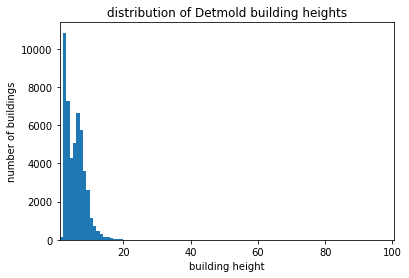

In [ ]:
plt.hist(detmold_buildings.GEB_HOEHE,bins=100)
plt.xlabel('building height')
plt.ylabel('number of buildings')
plt.title('distribution of Detmold building heights')
plt.xlim(detmold_buildings.GEB_HOEHE.min(), detmold_buildings.GEB_HOEHE.max())
plt.show()
#because max_height is 100

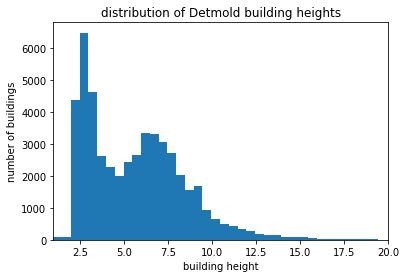

In [ ]:
plt.hist(detmold_buildings.GEB_HOEHE,bins=200)
plt.xlabel('building height')
plt.ylabel('number of buildings')
plt.title('distribution of Detmold building heights')
plt.xlim(detmold_buildings.GEB_HOEHE.min(), 20)
plt.show()
#########is it logical to find building height between 1 & 2?????????
######## highest density is around 2.5????????does it make sense?

does it make sense to have minimum height equal to 1? Maybe under construction?

In [ ]:
len(detmold_buildings.loc[detmold_buildings.GEB_HOEHE<=1])

1

In [ ]:
detmold_buildings.loc[detmold_buildings.GEB_HOEHE<=1].Funktion

3047    Überdachung
Name: Funktion, dtype: object

In [ ]:
detmold_buildings.Funktion.unique()
#to see if there are data centers

array(['Wohnhaus', 'Wohn- und Geschäftsgebäude', 'Schuppen',
       'Gemischt genutztes Gebäude mit Wohnen',
       'Gebäude für Wirtschaft oder Gewerbe', 'Seniorenheim',
       'Gartenhaus', 'Überdachung',
       'Kinderkrippe, Kindergarten, Kindertagesstätte', 'Feuerwehr',
       'Allgemein bildende Schule', 'Garage', 'Produktionsgebäude',
       'Lagerhalle, Lagerschuppen, Lagerhaus', 'Kinderheim',
       'Gebäude für soziale Zwecke', 'Wohnheim', 'Bürogebäude',
       'Gebäude für Handel und Dienstleistungen', 'Werkstatt', 'Parkhaus',
       'Wohngebäude mit Handel und Dienstleistungen',
       'Gebäude für Gewerbe und Industrie', 'Versicherung',
       'Speichergebäude', 'Sport-, Turnhalle',
       'Freizeit-, Vereinsheim, Dorfgemeinschafts-, Bürgerhaus',
       'Historische Mauer', 'Wasserwerk', 'Museum',
       'Hochschulgebäude (Fachhochschule, Universität)', 'Denkmal',
       'Bibliothek, Bücherei', 'Ärztehaus, Poliklinik',
       'Gebäude zur Freizeitgestaltung', 'Carport', 'F

In [ ]:
#visualize building functions where building height <2
detmold_buildings.loc[detmold_buildings.GEB_HOEHE<2][['Fest_ID','Funktion']].groupby(['Funktion']).count().sort_values(by=['Fest_ID'],ascending=False)
#canopy/roof, 50
#residential house WH, 36
#garage, 12
#converter, 11
#shed, 10
#carport, 8

,Fest_ID
Funktion,
Überdachung,50
Wohnhaus,36
Garage,12
Umformer,11
Schuppen,10
Carport,8
Denkmal,3
"Lagerhalle, Lagerschuppen, Lagerhaus",2
Silo,2


In [ ]:
detmold_buildings.JAHRES_T
#average annual temperature

0        9.2
1        9.2
2        9.1
3        9.1
4        9.1
        ... 
49351    9.3
49352    9.4
49353    9.4
49354    9.4
49355    9.2
Name: JAHRES_T, Length: 49356, dtype: float64

In [ ]:
detmold_buildings.JAHRES_T.describe()

count    49356.000000
mean         9.284537
std          0.214351
min          8.000000
25%          9.200000
50%          9.300000
75%          9.400000
max          9.600000
Name: JAHRES_T, dtype: float64

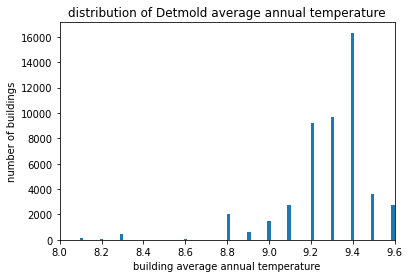

In [ ]:
plt.hist(detmold_buildings.JAHRES_T,bins=100)
plt.xlabel('building average annual temperature')
plt.ylabel('number of buildings')
plt.title('distribution of Detmold average annual temperature')
plt.xlim(detmold_buildings.JAHRES_T.min(), detmold_buildings.JAHRES_T.max())
plt.show()

In [ ]:
#building class
detmold_buildings.GEB_KLASSE

0        1
1        1
2        1
3        1
4        1
        ..
49351    1
49352    1
49353    0
49354    1
49355    1
Name: GEB_KLASSE, Length: 49356, dtype: int64

In [ ]:
#detmold_buildings.GEB_KLASSE.unique()
#0=not heated (independent of OS number);;
#2=non-residential buildings (NWG) with normal specified space heating demand;
#3=NWG with lower specified space heating demand; e.g. church
#4=NWG with increased specified space heating demand, e.g. hospital


#class 1 !!!!!

array([1, 0, 2, 3, 4])

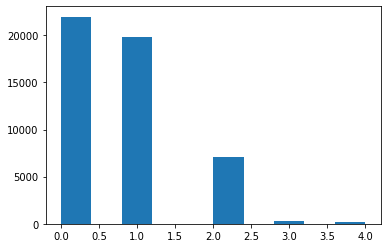

In [ ]:
plt.hist(detmold_buildings.GEB_KLASSE)
plt.show()

In [ ]:
detmold_buildings.VOL

0         158.278092
1          56.428289
2         184.094535
3          95.867688
4         146.370345
            ...     
49351     463.570257
49352     901.425945
49353      68.833606
49354    1354.698351
49355     395.941712
Name: VOL, Length: 49356, dtype: float64

In [ ]:
detmold_buildings.VOL.describe()

count     49356.000000
mean        748.711926
std        3245.935450
min           0.007942
25%          70.958280
50%         288.763753
75%         774.748488
max      302773.689875
Name: VOL, dtype: float64

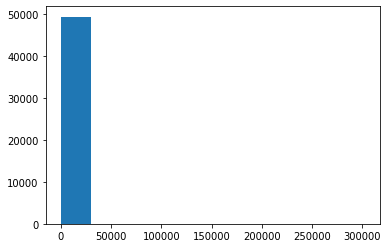

In [ ]:
plt.hist(detmold_buildings.VOL)
plt.show()
#appears like this because 25% of the data is highly dispersed(std=3245) between 774 (3rd quartile) & max value(302773)

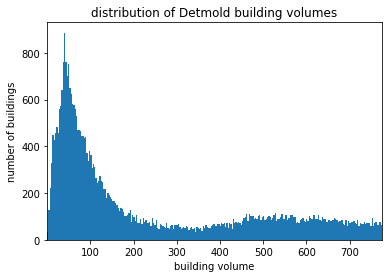

In [ ]:
#takes more than 2min to finish run!!!!! --> reduce n_bins
plt.hist(detmold_buildings.VOL,bins=100000)
plt.xlabel('building volume')
plt.ylabel('number of buildings')
plt.title('distribution of Detmold building volumes')
plt.xlim(detmold_buildings.VOL.min(), detmold_buildings.VOL.quantile(0.75))
plt.show()

In [ ]:
detmold_buildings.CellCode
#ID of the grid cell (area not a single building!!!!) of the INSPIRE grid
#to link with Zensus2011
#is there a link between zensus and microzensus????

0        100mN32033E42365
1        100mN32033E42364
2        100mN32033E42371
3        100mN32033E42371
4        100mN32035E42368
               ...       
49351    100mN32026E42412
49352    100mN32048E42372
49353    100mN32048E42372
49354    100mN32042E42436
49355    100mN32015E42462
Name: CellCode, Length: 49356, dtype: object

In [ ]:
detmold_buildings.CellCode.nunique()
#can be interesting to match the data with census data

4112

In [ ]:
detmold_buildings.Gemeindena.unique()
#verifies that all rows are only relative to Detmold

array(['Detmold'], dtype=object)

In [ ]:
detmold_buildings.Kreisname.unique()
#the only district available in the dataset is Lippe

array(['Lippe'], dtype=object)

In [ ]:
detmold_buildings.Funktion.nunique()

196

In [ ]:
#examples of building functions
detmold_buildings.Funktion.unique()[:10]

array(['Wohnhaus', 'Wohn- und Geschäftsgebäude', 'Schuppen',
       'Gemischt genutztes Gebäude mit Wohnen',
       'Gebäude für Wirtschaft oder Gewerbe', 'Seniorenheim',
       'Gartenhaus', 'Überdachung',
       'Kinderkrippe, Kindergarten, Kindertagesstätte', 'Feuerwehr'],
      dtype=object)

In [ ]:
detmold_buildings[['Fest_ID','Funktion']].groupby(['Funktion']).count().sort_values(by=['Fest_ID'],ascending=False)

,Fest_ID
Funktion,
Wohnhaus (allgemein),17137
Wirtschafts- oder Industriegebäude (allgemein),16882
Überdachung,5877
Wohn- oder öffentliches Gebäude (allgemein),1634
Gemischt genutztes Gebäude mit Wohnungen,1444
...,...
Gaswerk,1
"Stellwerk, Blockstelle",1
"Studentenwohnheim, Schülerwohnheim",1


In [ ]:
detmold_buildings[['Fest_ID','Funktion']].groupby(['Funktion']).count().sort_values(by=['Fest_ID'],ascending=False)[:10]
#top 10 existing building functions
#filter 1 and 5 together
#2 and 4 in a next step

,Fest_ID
Funktion,
Wohnhaus (allgemein),17137
Wirtschafts- oder Industriegebäude (allgemein),16882
Überdachung,5877
Wohn- oder öffentliches Gebäude (allgemein),1634
Gemischt genutztes Gebäude mit Wohnungen,1444
Überdachter Stellplatz (soweit nicht OS 5315),1145
Wohnhaus,901
Einzelgarage,600
Schuppen,508


In [ ]:
detmold_buildings.Shape_Leng
#building perimeter

0        20.510632
1        14.613911
2        20.962259
3        14.505134
4        23.121180
           ...    
49351    38.743002
49352    66.122551
49353    20.354803
49354    46.995936
49355    31.315481
Name: Shape_Leng, Length: 49356, dtype: float64

In [ ]:
detmold_buildings.Shape_Leng.describe()

count    49356.000000
mean        36.862475
std         29.986268
min          0.257938
25%         19.961737
50%         32.264001
75%         45.666323
max        957.399834
Name: Shape_Leng, dtype: float64

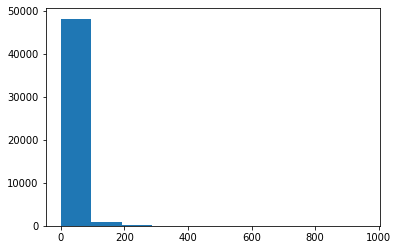

In [ ]:
plt.hist(detmold_buildings.Shape_Leng)
plt.show()

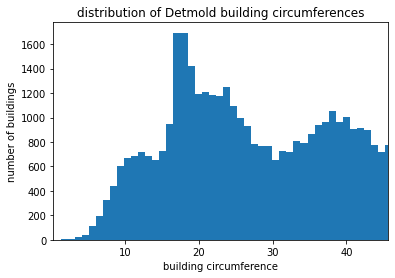

In [ ]:
#here we plot only the first 75% quantiles
plt.hist(detmold_buildings.Shape_Leng,bins=1000)
plt.xlabel('building circumference')
plt.ylabel('number of buildings')
plt.title('distribution of Detmold building circumferences')
plt.xlim(detmold_buildings.Shape_Leng.min(), detmold_buildings.Shape_Leng.quantile(0.75))
plt.show()

In [ ]:
detmold_buildings.Shape_Area

0         26.379682
1         12.034184
2         25.218429
3         13.132560
4         31.757506
            ...    
49351     80.341633
49352    183.965538
49353     22.204554
49354    133.074892
49355     59.008091
Name: Shape_Area, Length: 49356, dtype: float64

In [ ]:
detmold_buildings.Shape_Area.describe()

count    49356.000000
mean       102.409869
std        336.461112
min          0.000882
25%         21.676958
50%         58.379287
75%        113.101875
max      29911.240917
Name: Shape_Area, dtype: float64

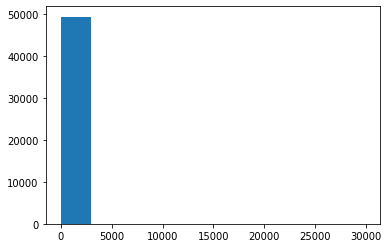

In [ ]:
plt.hist(detmold_buildings.Shape_Area)
plt.show()
#highly dispersed data

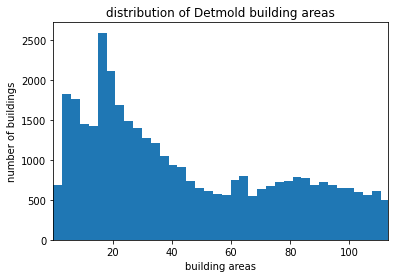

In [ ]:
#here we plot only the first 75% quantiles
plt.hist(detmold_buildings.Shape_Area,bins=10000)
plt.xlabel('building areas')
plt.ylabel('number of buildings')
plt.title('distribution of Detmold building areas')
plt.xlim(detmold_buildings.Shape_Area.min(), detmold_buildings.Shape_Area.quantile(0.75))
plt.show()

In [ ]:
detmold_buildings.xcoord

0        484284.114587
1        484254.667101
2        484966.626147
3        484968.156834
4        484620.397396
             ...      
49351    489030.172437
49352    484960.481229
49353    484968.275874
49354    491386.683026
49355    494034.222238
Name: xcoord, Length: 49356, dtype: float64

In [ ]:
detmold_buildings.xcoord.describe()

count     49356.000000
mean     490581.352139
std        2854.243157
min      483960.452951
25%      488742.866948
50%      491037.785789
75%      492269.095843
max      498407.520606
Name: xcoord, dtype: float64

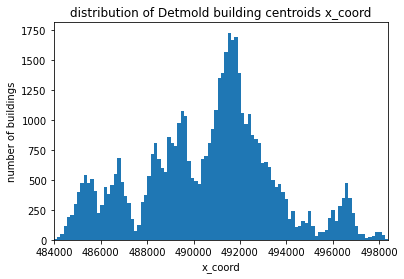

In [ ]:
plt.hist(detmold_buildings.xcoord,bins=100)
plt.xlabel('x_coord')
plt.ylabel('number of buildings')
plt.title('distribution of Detmold building centroids x_coord')
plt.xlim(detmold_buildings.xcoord.min(), detmold_buildings.xcoord.max())
plt.show()

In [ ]:
detmold_buildings.ycoord

0        5.753658e+06
1        5.753727e+06
2        5.753724e+06
3        5.753721e+06
4        5.753898e+06
             ...     
49351    5.753084e+06
49352    5.755202e+06
49353    5.755212e+06
49354    5.754722e+06
49355    5.752064e+06
Name: ycoord, Length: 49356, dtype: float64

In [ ]:
detmold_buildings.ycoord.describe()

count    4.935600e+04
mean     5.754119e+06
std      1.939580e+03
min      5.746273e+06
25%      5.753136e+06
50%      5.754326e+06
75%      5.755284e+06
max      5.760392e+06
Name: ycoord, dtype: float64

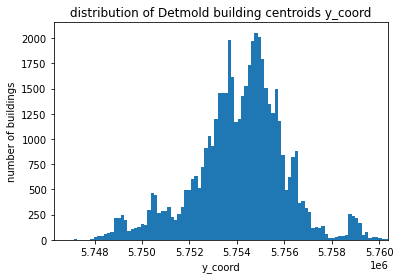

In [ ]:
plt.hist(detmold_buildings.ycoord,bins=100)
plt.xlabel('y_coord')
plt.ylabel('number of buildings')
plt.title('distribution of Detmold building centroids y_coord')
plt.xlim(detmold_buildings.ycoord.min(), detmold_buildings.ycoord.max())
plt.show()

In [ ]:
#consider NRW district by district?
#or is there a method to import NRW csv file and analyse the hole dataset

suggestions:


*   combine x,y coordinates with age & building type
*   see the buildings which are bordering each other



In [ ]:
#BAUJAHR_MZ in census2011: the period of building
#3rd column: 100mN26953E43439,CRS3035RES100mN2695300E4343900,BAUJAHR_MZ,02,1919 - 1948,3,0


links:

*   https://www.learndatasci.com/tutorials/geospatial-data-python-geopandas-shapely/

*   https://hatarilabs.com/ih-en/extract-point-value-from-a-raster-file-with-python-geopandas-and-rasterio-tutorial

*https://geopandas.org/en/stable/gallery/geopandas_rasterio_sample.html




# residential buildings

In [ ]:
#to verify that the # of class 1 buildings (residential) match the total number of buildings with residential type
len(detmold_buildings)-len(detmold_buildings.loc[detmold_buildings.GEBAEUDETY.isna()])==len(detmold_buildings.loc[detmold_buildings.GEB_KLASSE==1])

True

In [ ]:
#filter residential buildings from original dataset
residential_buildings=detmold_buildings.loc[detmold_buildings.GEB_KLASSE==1]

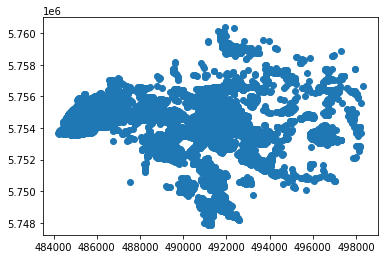

In [ ]:
#scatter plot of the residential buildings' locations (centroids (x,y) coordinates)
plt.scatter(residential_buildings['xcoord'],residential_buildings['ycoord'])
plt.show()

In [ ]:
#spez_WB_HU: Area-specific heat demand per house area(kWh/m²*a):
#space heating demand(RW)+water heating (WW); no process heat (PW)
X=residential_buildings[['xcoord','ycoord','spez_WB_HU']]


In [ ]:
X

,xcoord,ycoord,spez_WB_HU
0,484284.114587,5.753658e+06,80.385912
1,484254.667101,5.753727e+06,80.385912
2,484966.626147,5.753724e+06,80.646651
3,484968.156834,5.753721e+06,80.646651
4,484620.397396,5.753898e+06,80.646651
...,...,...,...
49349,490577.429503,5.753613e+06,123.812784
49351,489030.172437,5.753084e+06,144.111962
49352,484960.481229,5.755202e+06,131.799266
49354,491386.683026,5.754722e+06,158.572213


**1-clustering residential buildings taking into account: building position+area specific heat demand**

*the elbow method for optimal k*

In [ ]:
sse = []#sum of squared errors
k_range = range(1,21)#list of # of clusters=19 values from 1 to 19
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(X)
    sse.append(km.inertia_)#inertia_ is Sum of squared distances of samples to their closest cluster center,
    #weighted by the sample weights if provided

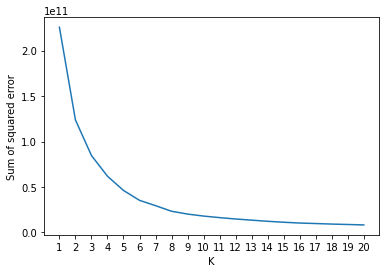

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.xticks(range(1,21))
plt.plot(k_range,sse)

k=8 seems to be the optimal # of clusters. After k=8 adding another cluster doesn't give much better modeling of the data.



In [ ]:
X.spez_WB_HU.nunique()
#the number of unique values of 'spez_WB_HU'

2457

In [ ]:
X['spez_WB_HU']

0         80.385912
1         80.385912
2         80.646651
3         80.646651
4         80.646651
            ...    
49349    123.812784
49351    144.111962
49352    131.799266
49354    158.572213
49355    129.151315
Name: spez_WB_HU, Length: 19848, dtype: float64

In [ ]:
#we cluster the buildings based on their position and area-specific heat demand

# Create cluster feature
kmeans = KMeans(n_clusters=8)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

#kmeans = KMeans(n_clusters=4)
#clusters = kmeans.fit_predict(X_normalized)
#X_normalized["Cluster"] = X_normalized["Cluster"].astype("category")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X.head()

,xcoord,ycoord,spez_WB_HU,Cluster
0,484284.114587,5.753658e+06,80.385912,7
1,484254.667101,5.753727e+06,80.385912,7
2,484966.626147,5.753724e+06,80.646651,7
3,484968.156834,5.753721e+06,80.646651,7
4,484620.397396,5.753898e+06,80.646651,7


In [ ]:
kmeans.cluster_centers_

array([[4.93009630e+05, 5.75270101e+06, 1.50053856e+02],
       [4.88748973e+05, 5.75519687e+06, 1.40155041e+02],
       [4.91287831e+05, 5.75009218e+06, 1.50596145e+02],
       [4.91675720e+05, 5.75468215e+06, 1.47206711e+02],
       [4.96389029e+05, 5.75416318e+06, 1.42033382e+02],
       [4.92575660e+05, 5.75723662e+06, 1.42752649e+02],
       [4.89440594e+05, 5.75296075e+06, 1.42180073e+02],
       [4.85947084e+05, 5.75489122e+06, 1.35487437e+02]])

In [ ]:
kmeans.labels_

array([7, 7, 7, ..., 7, 3, 0], dtype=int32)

In [ ]:
kmeans.n_iter_

11

In [ ]:
kmeans.n_features_in_

3

In [ ]:
kmeans.feature_names_in_

array(['xcoord', 'ycoord', 'spez_WB_HU'], dtype=object)

In [ ]:
kmeans.fit_transform(X).shape

(19848, 8)

In [ ]:
kmeans.fit_transform(X)[0,:]

array([ 2071.00676755,  7457.13060993,  8780.66134504,  5199.75881953,
       12116.19536686,  7858.40693292,  4715.94517137,  9036.61120349])

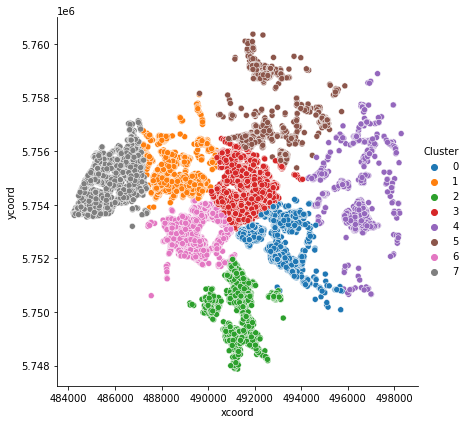

In [ ]:
sns.relplot(
    x="xcoord", y="ycoord", hue="Cluster", data=X, height=6,
);

In [ ]:
#number of buildings per cluster
X.groupby(['Cluster']).count()['xcoord']

Cluster
0    2459
1    2358
2    1837
3    4554
4    1183
5    1590
6    2895
7    2972
Name: xcoord, dtype: int64

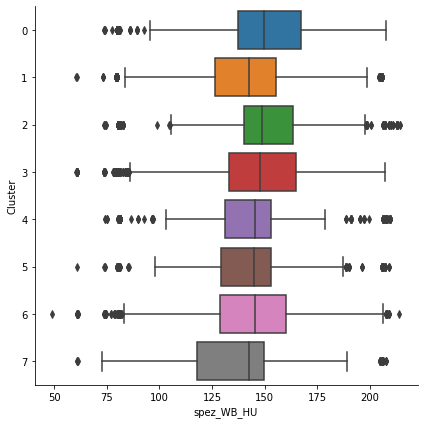

In [ ]:
sns.catplot(x="spez_WB_HU", y="Cluster", data=X, kind="box", height=6)

clusters are relatively close to each and no relevant distinction can be made. Thus we try increasing the number of clusters and see whether this gives much more insight.

In [ ]:
average_cluster_size=100
number_of_clusters=int(len(X)/average_cluster_size)

In [ ]:
number_of_clusters

198

In [ ]:
#spez_WB_HU: Area-specific heat demand per house area(kWh/m²*a):
#space heating demand(RW)+water heating (WW); no process heat (PW)
X=residential_buildings[['xcoord','ycoord','spez_WB_HU']]


In [ ]:
kmeans = KMeans(n_clusters=number_of_clusters)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X.head()

,xcoord,ycoord,spez_WB_HU,Cluster
0,484284.114587,5.753658e+06,80.385912,0
1,484254.667101,5.753727e+06,80.385912,0
2,484966.626147,5.753724e+06,80.646651,0
3,484968.156834,5.753721e+06,80.646651,0
4,484620.397396,5.753898e+06,80.646651,0


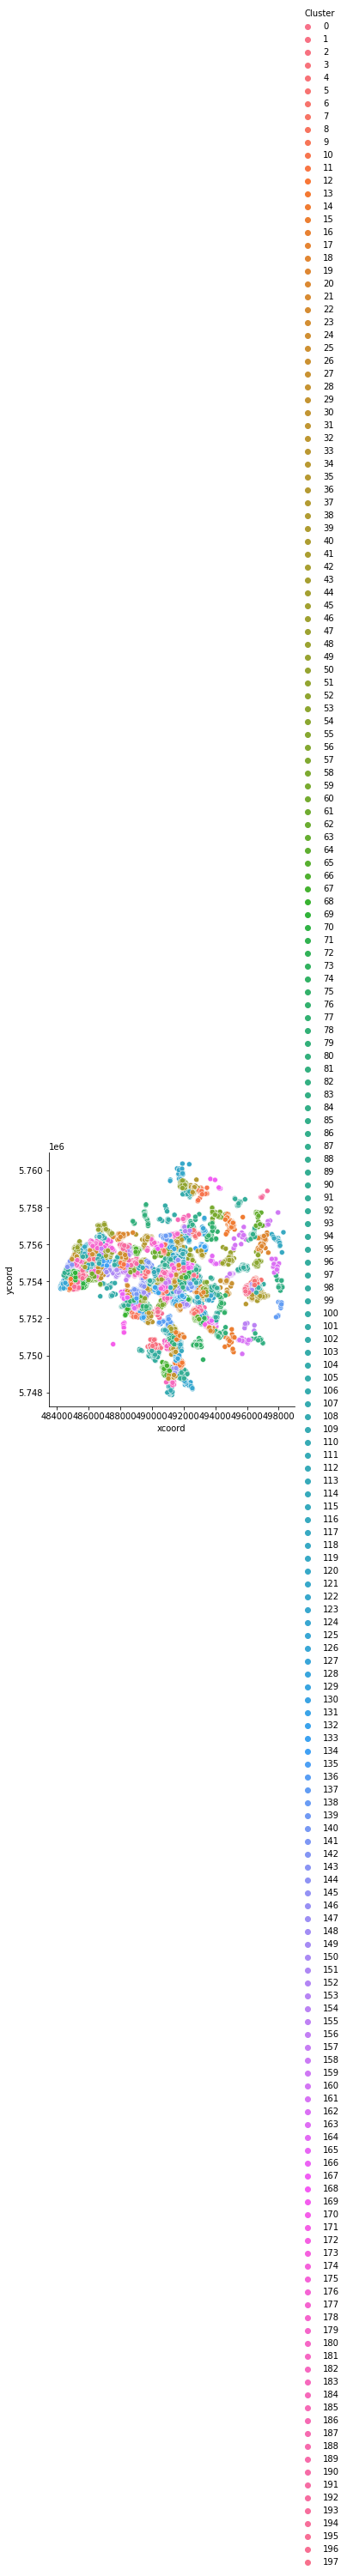

In [ ]:
sns.relplot(
    x="xcoord", y="ycoord", hue="Cluster", data=X, #height=number_of_clusters,
);

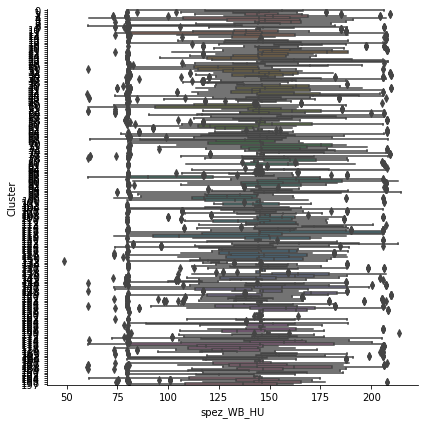

In [ ]:
sns.catplot(x="spez_WB_HU", y="Cluster", data=X, kind="box", height=6)

**2-clustering residential buildings by taking only area specific heat demand as feature**

In [ ]:
#spez_WB_HU: Area-specific heat demand per house area(kWh/m²*a):
#space heating demand(RW)+water heating (WW); no process heat (PW)
X=residential_buildings[['xcoord','ycoord','spez_WB_HU']]


*the elbow method for optimal k*

In [ ]:
sse = []#sum of squared errors
k_range = range(1,21)#list of # of clusters=19 values from 1 to 19
for k in k_range:
    km = KMeans(n_clusters=k,random_state=1)#(random_state=1) in order to return the same result
    km.fit_predict(X[['spez_WB_HU']])
    sse.append(km.inertia_)#inertia_ is Sum of squared distances of samples to their closest cluster center,
    #weighted by the sample weights if provided

remark:

*   pay attention! kmeans' result depends on initialization of centroids. So in order to maintain the same result we should specify the initial centroids or make 'random_state=i', where i is an integer





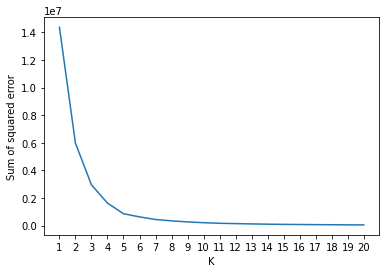

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.xticks(range(1,21))
plt.plot(k_range,sse)

k=5 seems to be the optimal # of clusters. After k=5 adding another cluster doesn't give much better modeling of the data.



In [ ]:
#we cluster the buildings based on their position and area-specific heat demand

# Create cluster feature
kmeans = KMeans(n_clusters=5,random_state=1)
X["Cluster"] = kmeans.fit_predict(X[['spez_WB_HU']])
X["Cluster"] = X["Cluster"].astype("category")

#kmeans = KMeans(n_clusters=4)
#clusters = kmeans.fit_predict(X_normalized)
#X_normalized["Cluster"] = X_normalized["Cluster"].astype("category")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X.head()

,xcoord,ycoord,spez_WB_HU,Cluster
0,484284.114587,5.753658e+06,80.385912,1
1,484254.667101,5.753727e+06,80.385912,1
2,484966.626147,5.753724e+06,80.646651,1
3,484968.156834,5.753721e+06,80.646651,1
4,484620.397396,5.753898e+06,80.646651,1


In [ ]:
kmeans.cluster_centers_
#the centroids' heat demand values

array([[142.97404089],
       [ 82.28897738],
       [190.00306244],
       [119.63380938],
       [162.19803943]])

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 0, 4, 3], dtype=int32)

In [ ]:
kmeans.n_iter_
#the kmeans algorithm makes 7 iterations in order to converge to the final clusters

7

In [ ]:
kmeans.n_features_in_

1

In [ ]:
kmeans.feature_names_in_

array(['spez_WB_HU'], dtype=object)

In [ ]:
kmeans.fit_transform(X).shape
#transforms the observation into a space with dimension (#observations,#centroids)

(19848, 5)

In [ ]:
kmeans.fit_transform(X)[0,:]

array([ 2581.30302987,  8081.43447392,  5318.88020882,  7851.61609758,
       11077.63052687])

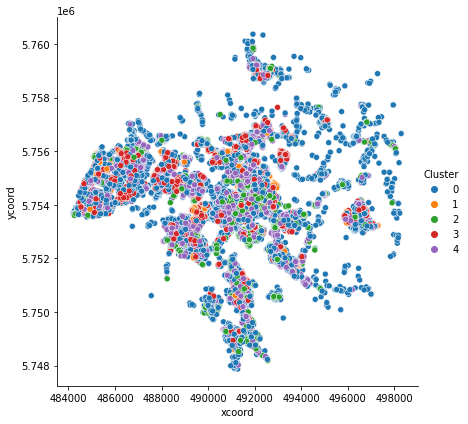

In [ ]:
sns.relplot(
    x="xcoord", y="ycoord", hue="Cluster", data=X, height=6,
);

obviously clusters are no longer grouped by position

In [ ]:
#number of buildings per cluster
X.groupby(['Cluster']).count()['xcoord']

Cluster
0    7502
1    1414
2    1951
3    3758
4    5223
Name: xcoord, dtype: int64

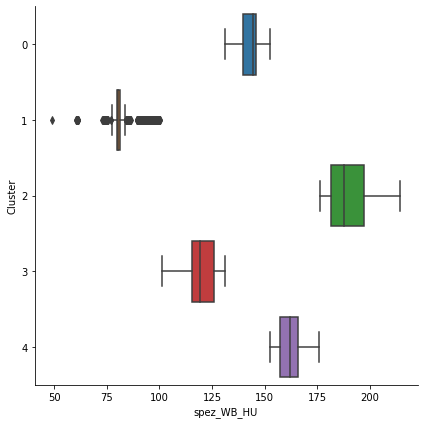

In [ ]:
sns.catplot(x="spez_WB_HU", y="Cluster", data=X, kind="box", height=6)

green cluster is characterised by:


*   highest area specific heat demand
*   2nd lowest number of buildings/cluster
*   highest inter-quartile distance

black cluster is characterised by:

*   lowest area specific heat demand
*   lowest number of buildings/cluster
*   lowest inter-quartile distance


In [ ]:
#green cluster
#let's explore the following features in green & black clusters: GEB_HOEHE, VOL, Funktion, spez_WB_HU, Shape_Area
X['GEB_HOEHE']=residential_buildings['GEB_HOEHE']
X['VOL']=residential_buildings['VOL']
X['Funktion']=residential_buildings['Funktion']
X['Shape_Area']=residential_buildings['Shape_Area']
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,xcoord,ycoord,spez_WB_HU,Cluster,GEB_HOEHE,VOL,Funktion,Shape_Area
0,484284.114587,5.753658e+06,80.385912,1,6.000,158.278092,Wohnhaus,26.379682
1,484254.667101,5.753727e+06,80.385912,1,4.689,56.428289,Wohnhaus,12.034184
2,484966.626147,5.753724e+06,80.646651,1,7.300,184.094535,Wohnhaus,25.218429
3,484968.156834,5.753721e+06,80.646651,1,7.300,95.867688,Wohnhaus,13.132560
4,484620.397396,5.753898e+06,80.646651,1,4.609,146.370345,Wohnhaus,31.757506
...,...,...,...,...,...,...,...,...
49349,490577.429503,5.753613e+06,123.812784,3,9.440,1953.806477,Wohnhaus (allgemein),206.971504
49351,489030.172437,5.753084e+06,144.111962,0,5.770,463.570257,Wohnhaus (allgemein),80.341633
49352,484960.481229,5.755202e+06,131.799266,0,4.900,901.425945,Wohnhaus (allgemein),183.965538
49354,491386.683026,5.754722e+06,158.572213,4,10.180,1354.698351,Wohnhaus (allgemein),133.074892


In [ ]:
X.groupby(['Cluster']).mean()[['spez_WB_HU','GEB_HOEHE','VOL','Shape_Area']]
#cluster2: highest heat demand values
#cluster1: lowest heat deamnd values

,spez_WB_HU,GEB_HOEHE,VOL,Shape_Area
Cluster,,,,
0,142.932095,7.411594,1018.785591,129.496195
1,82.275686,7.484746,846.076385,96.950739
2,190.003062,7.116228,667.234327,92.193233
3,119.544916,7.396376,964.063741,122.315289
4,162.198039,7.134453,748.282921,103.605528


remarks:

*   cluster2 (highest heat demand) is characterised by lowest buildings' height, lowest buildings' volume, lowest area shape (in average)
*   cluster1 (lowest heat demand) is characterised by highest buildings' height in average

   



In [ ]:
from sklearn import feature_selection
#compute mutual information between the different features and the target variable
feature_selection.mutual_info_regression(X[['GEB_HOEHE','VOL','Shape_Area']], X['spez_WB_HU'])

array([0.12091295, 0.2877957 , 0.35865224])

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [ ]:
from scipy import stats
print(stats.spearmanr(X['spez_WB_HU'],X['GEB_HOEHE']))
print(stats.spearmanr(X['spez_WB_HU'],X['VOL']))
print(stats.spearmanr(X['spez_WB_HU'],X['Shape_Area']))

SpearmanrResult(correlation=-0.04798591500425297, pvalue=1.3435654876887052e-11)
SpearmanrResult(correlation=-0.05031945595146931, pvalue=1.3104648240598028e-12)
SpearmanrResult(correlation=-0.07106185500377633, pvalue=1.2023774471441834e-23)


Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

In [ ]:
X.groupby(['Cluster']).std()[['spez_WB_HU','GEB_HOEHE','VOL','Shape_Area']]

,spez_WB_HU,GEB_HOEHE,VOL,Shape_Area
Cluster,,,,
0,5.100469,2.118110,975.366547,90.295549
1,7.099292,2.847467,1697.710022,123.824978
2,10.215152,1.812966,313.401930,37.477405
3,7.279187,2.043568,825.804802,66.527946
4,6.102630,1.771865,333.436967,38.778584


In [ ]:
cluster2_functions=X[X['Cluster']==2].groupby(['Funktion']).count()
cluster2_functions
#retirement home
#residential or public building
#Residential building with trade and services
#Residential house
#Dormitory

,xcoord,ycoord,spez_WB_HU,Cluster,GEB_HOEHE,VOL,Shape_Area
Funktion,,,,,,,
"Seniorenwohnhaus, Seniorenheim",1,1,1,1,1,1,1
Wohn- oder öffentliches Gebäude (allgemein),375,375,375,375,375,375,375
Wohngebäude mit Handel und Dienstleistungen,4,4,4,4,4,4,4
Wohnhaus (allgemein),1569,1569,1569,1569,1569,1569,1569
Wohnheim (allgemein),2,2,2,2,2,2,2


In [ ]:
#print('% of Seniorenwohnhaus, Seniorenheim in cluster2: '+str(1/residential_buildings.groupby(['Funktion']).count().loc['Seniorenwohnhaus, Seniorenheim'][0])+ ' %')
#print('% of Wohn- oder öffentliches Gebäude (allgemein) in cluster2: '+str(1/residential_buildings.groupby(['Funktion']).count().loc['Wohn- oder öffentliches Gebäude (allgemein)'][0])+ ' %')
#print('% of Wohngebäude mit Handel und Dienstleistungen in cluster2: '+str(1/residential_buildings.groupby(['Funktion']).count().loc['Wohngebäude mit Handel und Dienstleistungen'][0])+ ' %')
#print('% of Wohnhaus (allgemein) in cluster2: '+str(1/residential_buildings.groupby(['Funktion']).count().loc['Wohnhaus (allgemein)'][0])+ ' %')
#print('% of Wohnheim (allgemein) in cluster2: '+str(1/residential_buildings.groupby(['Funktion']).count().loc['Wohnheim (allgemein)'][0])+ ' %')

In [ ]:
cluster1_functions=X[X['Cluster']==1].groupby(['Funktion']).count()
cluster1_functions
#children home
#retirement home
#Residential or public building
#residential and commercial buildings
#residential building with trade and services
#Residential house

,xcoord,ycoord,spez_WB_HU,Cluster,GEB_HOEHE,VOL,Shape_Area
Funktion,,,,,,,
Kinderheim,3,3,3,3,3,3,3
Seniorenheim,36,36,36,36,36,36,36
"Seniorenwohnhaus, Seniorenheim",2,2,2,2,2,2,2
Wohn- oder öffentliches Gebäude (allgemein),4,4,4,4,4,4,4
Wohn- und Geschäftsgebäude,2,2,2,2,2,2,2
Wohngebäude,9,9,9,9,9,9,9
Wohngebäude mit Handel und Dienstleistungen,7,7,7,7,7,7,7
Wohnhaus,901,901,901,901,901,901,901
Wohnhaus (allgemein),440,440,440,440,440,440,440


cluster buildings by area

In [ ]:
residential_buildings.groupby(['spez_WB_HU']).count()

,fid,Fest_ID,OS,GEB_HOEHE,JAHRES_T,GEB_KLASSE,VOL,GEBAEUDETY,AGS,AGS5,...,Funktion,GEB_TYP,WB_HU,EBZ_Final,WLD_ID,GEB_TYP_IF,Shape_Leng,Shape_Area,xcoord,ycoord
spez_WB_HU,,,,,,,,,,,,,,,,,,,,,
48.843353,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
60.191208,2,2,2,2,2,2,2,2,2,2,...,2,0,2,2,2,2,2,2,2,2
60.586812,17,17,17,17,17,17,17,17,17,17,...,17,0,17,17,17,17,17,17,17,17
60.784614,9,9,9,9,9,9,9,9,9,9,...,9,0,9,9,9,9,9,9,9,9
60.982416,4,4,4,4,4,4,4,4,4,4,...,4,0,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210.285839,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
211.186984,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
213.202766,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18


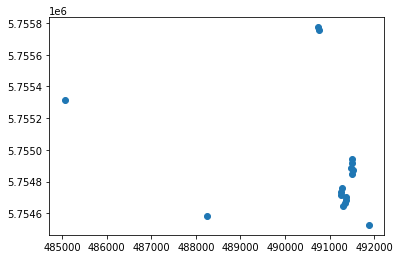

In [ ]:
example=residential_buildings.loc[residential_buildings['spez_WB_HU']==60.586812]
plt.scatter(example['xcoord'],example['ycoord'])
plt.show()



*   return the centroids of each cluster as a specific building
*   link to census2011 and provide average age/cluster



suggestions:

*   try a lower # buildings, e.g. 1000 buildings/cluster
*   add other features to the heat demand as clustering features (height, density,...)
*   technical report(10p): objectives, steps, useful results, difficulties,...





In [ ]:
#putty software
#kmeans result of clustering changes due to initialization of centroids

after clustering by heat demand cluster by distance and see the % of every cluster type in the 2nd clusters

